In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing

# use seaborn plotting defaults
import seaborn as sns; sns.set()


features = pd.read_csv("../data/new_labeled_features.csv",index_col=0)
tfeatures = features.T







## Select K Best for feature selection, after normalization/scaling

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler

norm_list = [Normalizer(), StandardScaler(with_mean=False), MinMaxScaler()]
selK = SelectKBest(f_classif, k=4)
tnfeatures = norm_list[0].transform(tfeatures.iloc[:28, :])
nfeatures = tnfeatures.T
selK.fit(nfeatures, features.iloc[:, -1])
print("SELECT K BEST NUMBERS:")
print(selK.get_support())
print(selK.scores_[selK.get_support()])
for norm in norm_list[1:]:
    nfeatures = norm.fit_transform(features.iloc[:, :28])
    selK.fit(nfeatures, features.iloc[:, -1])
    print("\n\nSELECT K BEST NUMBERS:")
    print(selK.get_support())
    print(selK.scores_[selK.get_support()])







## Select K Best for all 4 signals, after normalization

In [27]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.preprocessing import Normalizer, MinMaxScaler

#norm = Normalizer()
norm = MinMaxScaler()
selK = [SelectKBest(f_classif, k=4), SelectKBest(chi2, k=4), SelectKBest(mutual_info_classif, k=4)]
col = features.columns
for sel in selK:
    for i in range(4):
        #tnfeatures = norm.transform(tfeatures.iloc[i*28:(i+1)*28, :])
        #nfeatures = tnfeatures.T
        nfeatures = norm.fit_transform(features.iloc[:, i*28:(i+1)*28])
        sel.fit(nfeatures, features.label)
        print("\nSELECT K BEST NUMBERS FOR signal %d:"%(i))
        print(sel.get_support())
        print(sel.scores_[sel.get_support()])
        feat = col[i*28:(i+1)*28]
        print(feat[sel.get_support()])
    print("\n\n Next Selector:")


SELECT K BEST NUMBERS FOR signal 0:
[False False False False False False False False False False  True False
 False False False False  True  True  True False False False False False
 False False False False]
[330.9079015  422.54146592 335.18651221 382.78688292]
Index(['10', '16', '17', '18'], dtype='object')

SELECT K BEST NUMBERS FOR signal 1:
[False False False False False False False False False False False False
 False  True  True False False False False False False  True  True False
 False False False False]
[311.06969737 306.34495183 356.91090893 321.01200709]
Index(['41', '42', '49', '50'], dtype='object')

SELECT K BEST NUMBERS FOR signal 2:
[False False False False False False False False False False  True False
 False False False False  True  True  True False False False False False
 False False False False]
[329.72298115 422.36009665 335.43952703 382.80602317]
Index(['66', '72', '73', '74'], dtype='object')

SELECT K BEST NUMBERS FOR signal 3:
[False False False False False

In [ ]:
SELECT K BEST NUMBERS FOR signal 0:
[False False False False False False False False False False  True False
 False False False False  True  True  True False False False False False
 False False False False]
[330.9079015  422.54146593 335.18651221 382.78688292]
Index(['10', '16', '17', '18'], dtype='object')


SELECT K BEST NUMBERS FOR signal 1:
[False False False False False False False False False False False False
 False  True  True False False False False False False  True  True False
 False False False False]
[311.06969737 306.34495183 356.91090893 321.01200709]
Index(['41', '42', '49', '50'], dtype='object')


SELECT K BEST NUMBERS FOR signal 2:
[False False False False False False False False False False  True False
 False False False False  True  True  True False False False False False
 False False False False]
[329.72298115 422.36009666 335.43952703 382.80602317]
Index(['66', '72', '73', '74'], dtype='object')


SELECT K BEST NUMBERS FOR signal 3:
[False False False False False False False False False False False False
 False  True  True False False False False False False  True  True False
 False False False False]
[313.39261435 304.34262507 361.47049712 319.38287379]
Index(['97', '98', '105', '106'], dtype='object')







## feature selection for the 4 normalized signals, using RFECV with Logistic Regression

Optimal number of features : 17


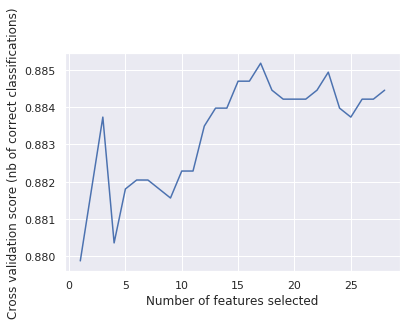

rfecv ranking:
[ 1  1  5  1  1  1  1  1  1  6  4  3  2  1  9  7  1  1  1  8  1  1 10 12
  1  1 11  1]
[ 0  1  3  4  5  6  7  8 13 16 17 18 20 21 24 25 27]


Optimal number of features : 7


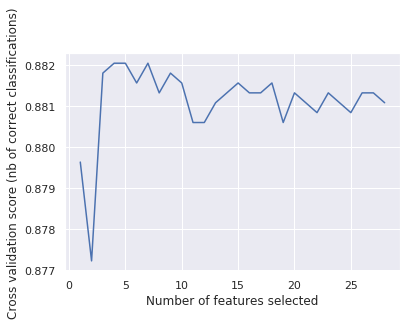

rfecv ranking:
[ 2  1  5  4  1  6  1  3 17 16 21 20 11  1 13 18 12 14  8  7  1  1  1 19
 15 22 10  9]
[29 32 34 41 48 49 50]


Optimal number of features : 13


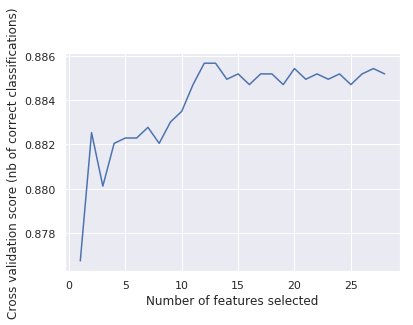

rfecv ranking:
[ 1  1  1  8 10  7  1  1  1  5 12  4  1  1  2 14  1  1  1 13  3  6 16 15
  9  1  1 11]
[56 57 58 62 63 64 68 69 72 73 74 81 82]


Optimal number of features : 28


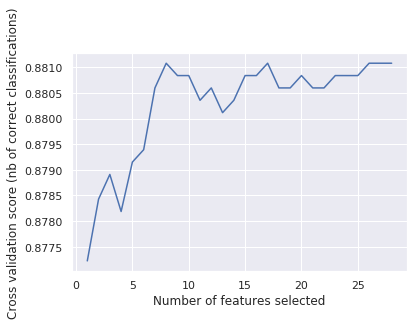

rfecv ranking:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[ 84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111]


[ True  True False  True  True  True  True  True  True False False False
 False  True False False  True  True  True False  True  True False False
  True  True False  True False  True False False  True False  True False
 False False False False False  True False False False False False False
  True  True  True False False False False False  True  True  True False
 False False  True  True  True False False False  True  True False False
  True  True  True False False False False False False  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


/home/vasilis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/vasilis/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/vasilis/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/vasilis/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwa

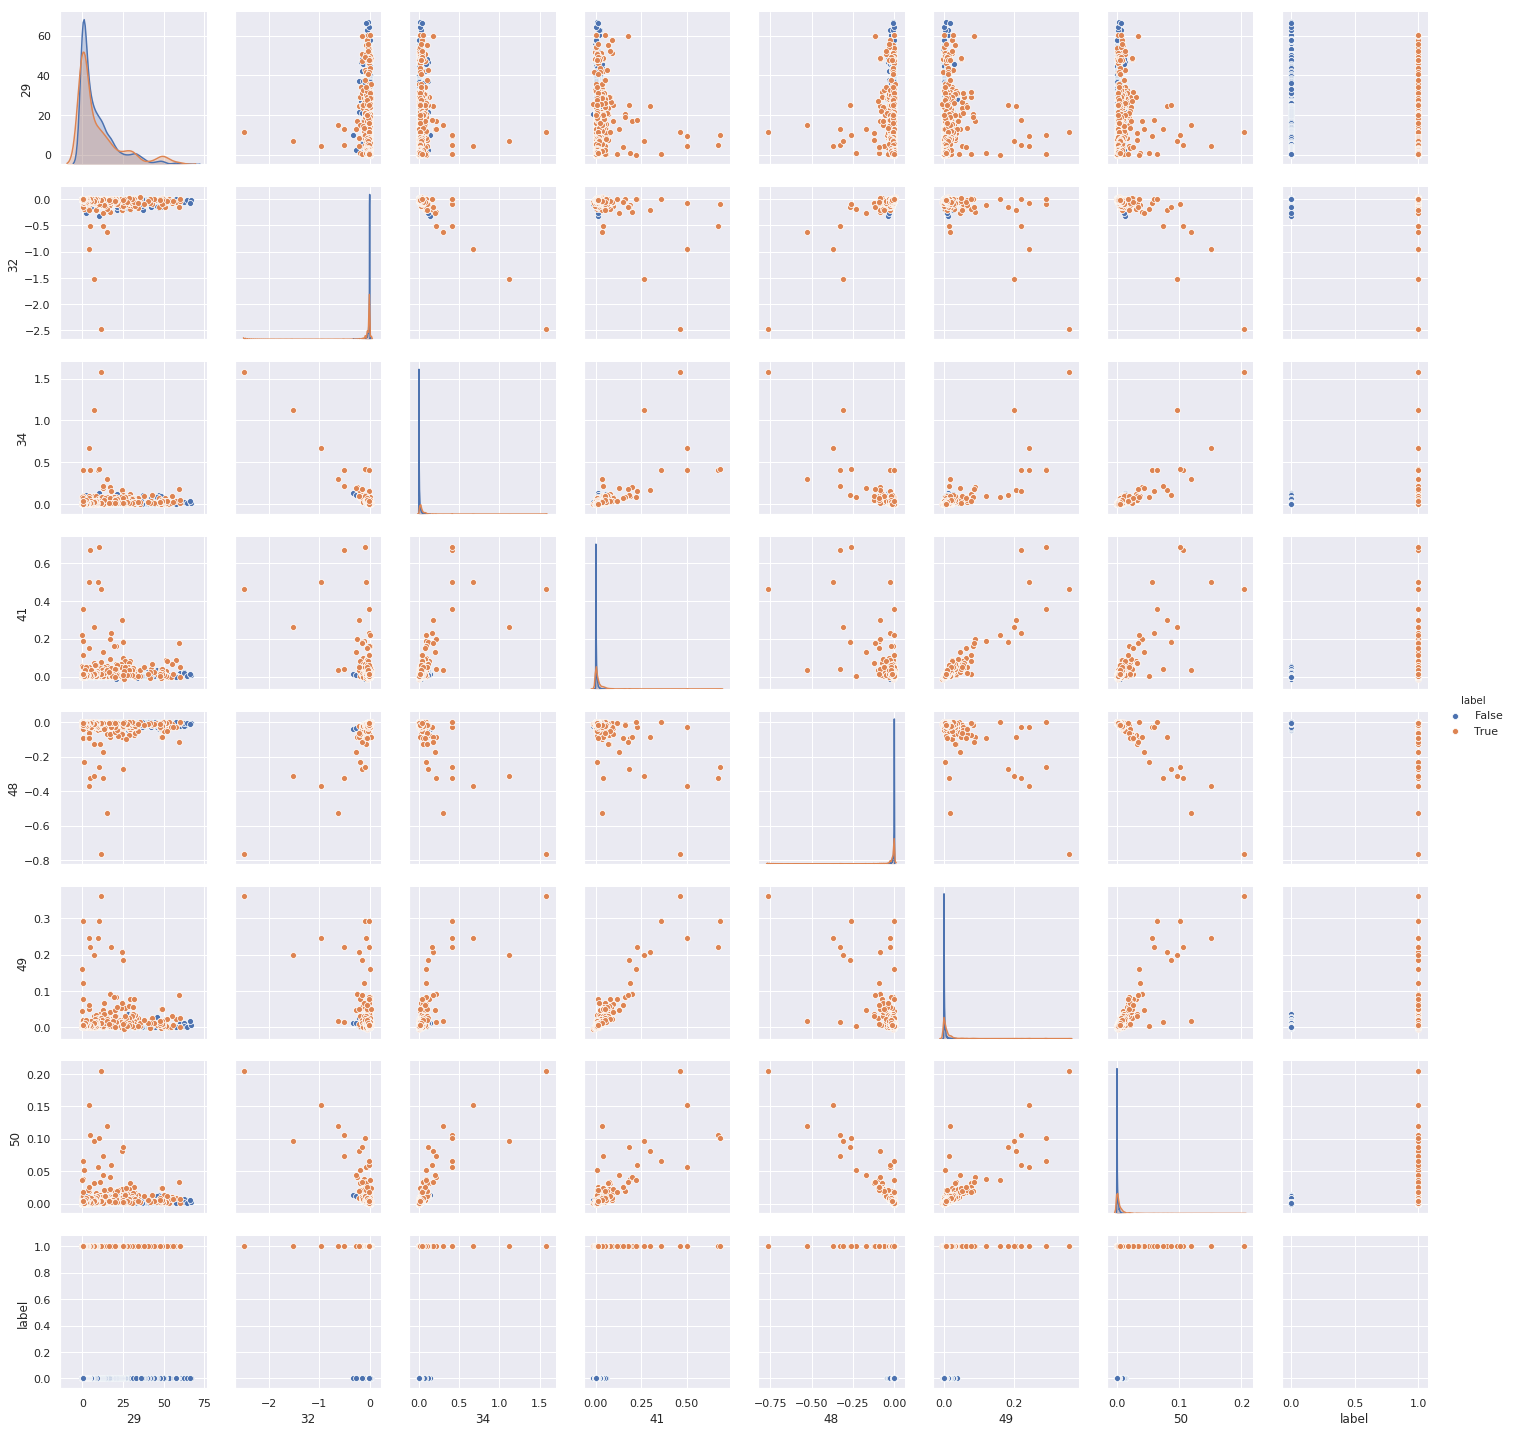

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer

estimators_list = [LogisticRegression(C=1000, tol=0.001)]
col = features.columns
norm = Normalizer()
selected = np.empty(shape=(0,), dtype=bool)
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct
# classifications
for i in range(4):
    for est in estimators_list:
        rfecv = RFECV(estimator=est, step=1, cv=StratifiedKFold(5),scoring='accuracy')
        tnfeatures = norm.transform(tfeatures.iloc[i*28:(i+1)*28, :])
        nfeatures = tnfeatures.T
        rfecv.fit(nfeatures, features.iloc[:, -1])

        print("Optimal number of features : %d" % rfecv.n_features_)

        # Plot number of features VS. cross-validation scores
        fig = plt.figure()
        plt.xlabel("Number of features selected")
        plt.ylabel("Cross validation score (nb of correct classifications)")
        plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
        plt.show()
        print("rfecv ranking:")
        print(rfecv.ranking_)
        feat = np.array([k for k in range(i*28,(i+1)*28)])
        #feat = col[i*28:(i+1)*28]
        if i==1:
            ind = feat[rfecv.get_support()]
        selected=np.concatenate([selected, rfecv.get_support()])
        print(feat[rfecv.get_support()])
    print()
    print()
print(selected)
featuresPart = pd.concat([features.iloc[:, ind], features.label], axis=1)
sns.pairplot(featuresPart, hue='label', height=2.5)







## The features set as important for each normalized signal by 2 ensemble classifiers

[ 0  1  3  8 10 16 17 18 24 25 27]


/home/vasilis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/vasilis/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/vasilis/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/vasilis/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwa

[ 0  1  3  8 10 16 17 18 24 25 27]


/home/vasilis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/vasilis/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/vasilis/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/vasilis/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwa




[28 29 30 31 33 34 40 41 42 48 49 50]
[28 29 30 31 33 34 41 42 48 49 50]



[58 64 65 66 72 73 74]
[58 64 65 66 72 73 74 81 82]



[ 89  90  96  97  98 104 105 106]
[ 89  90  97  98 104 105 106]





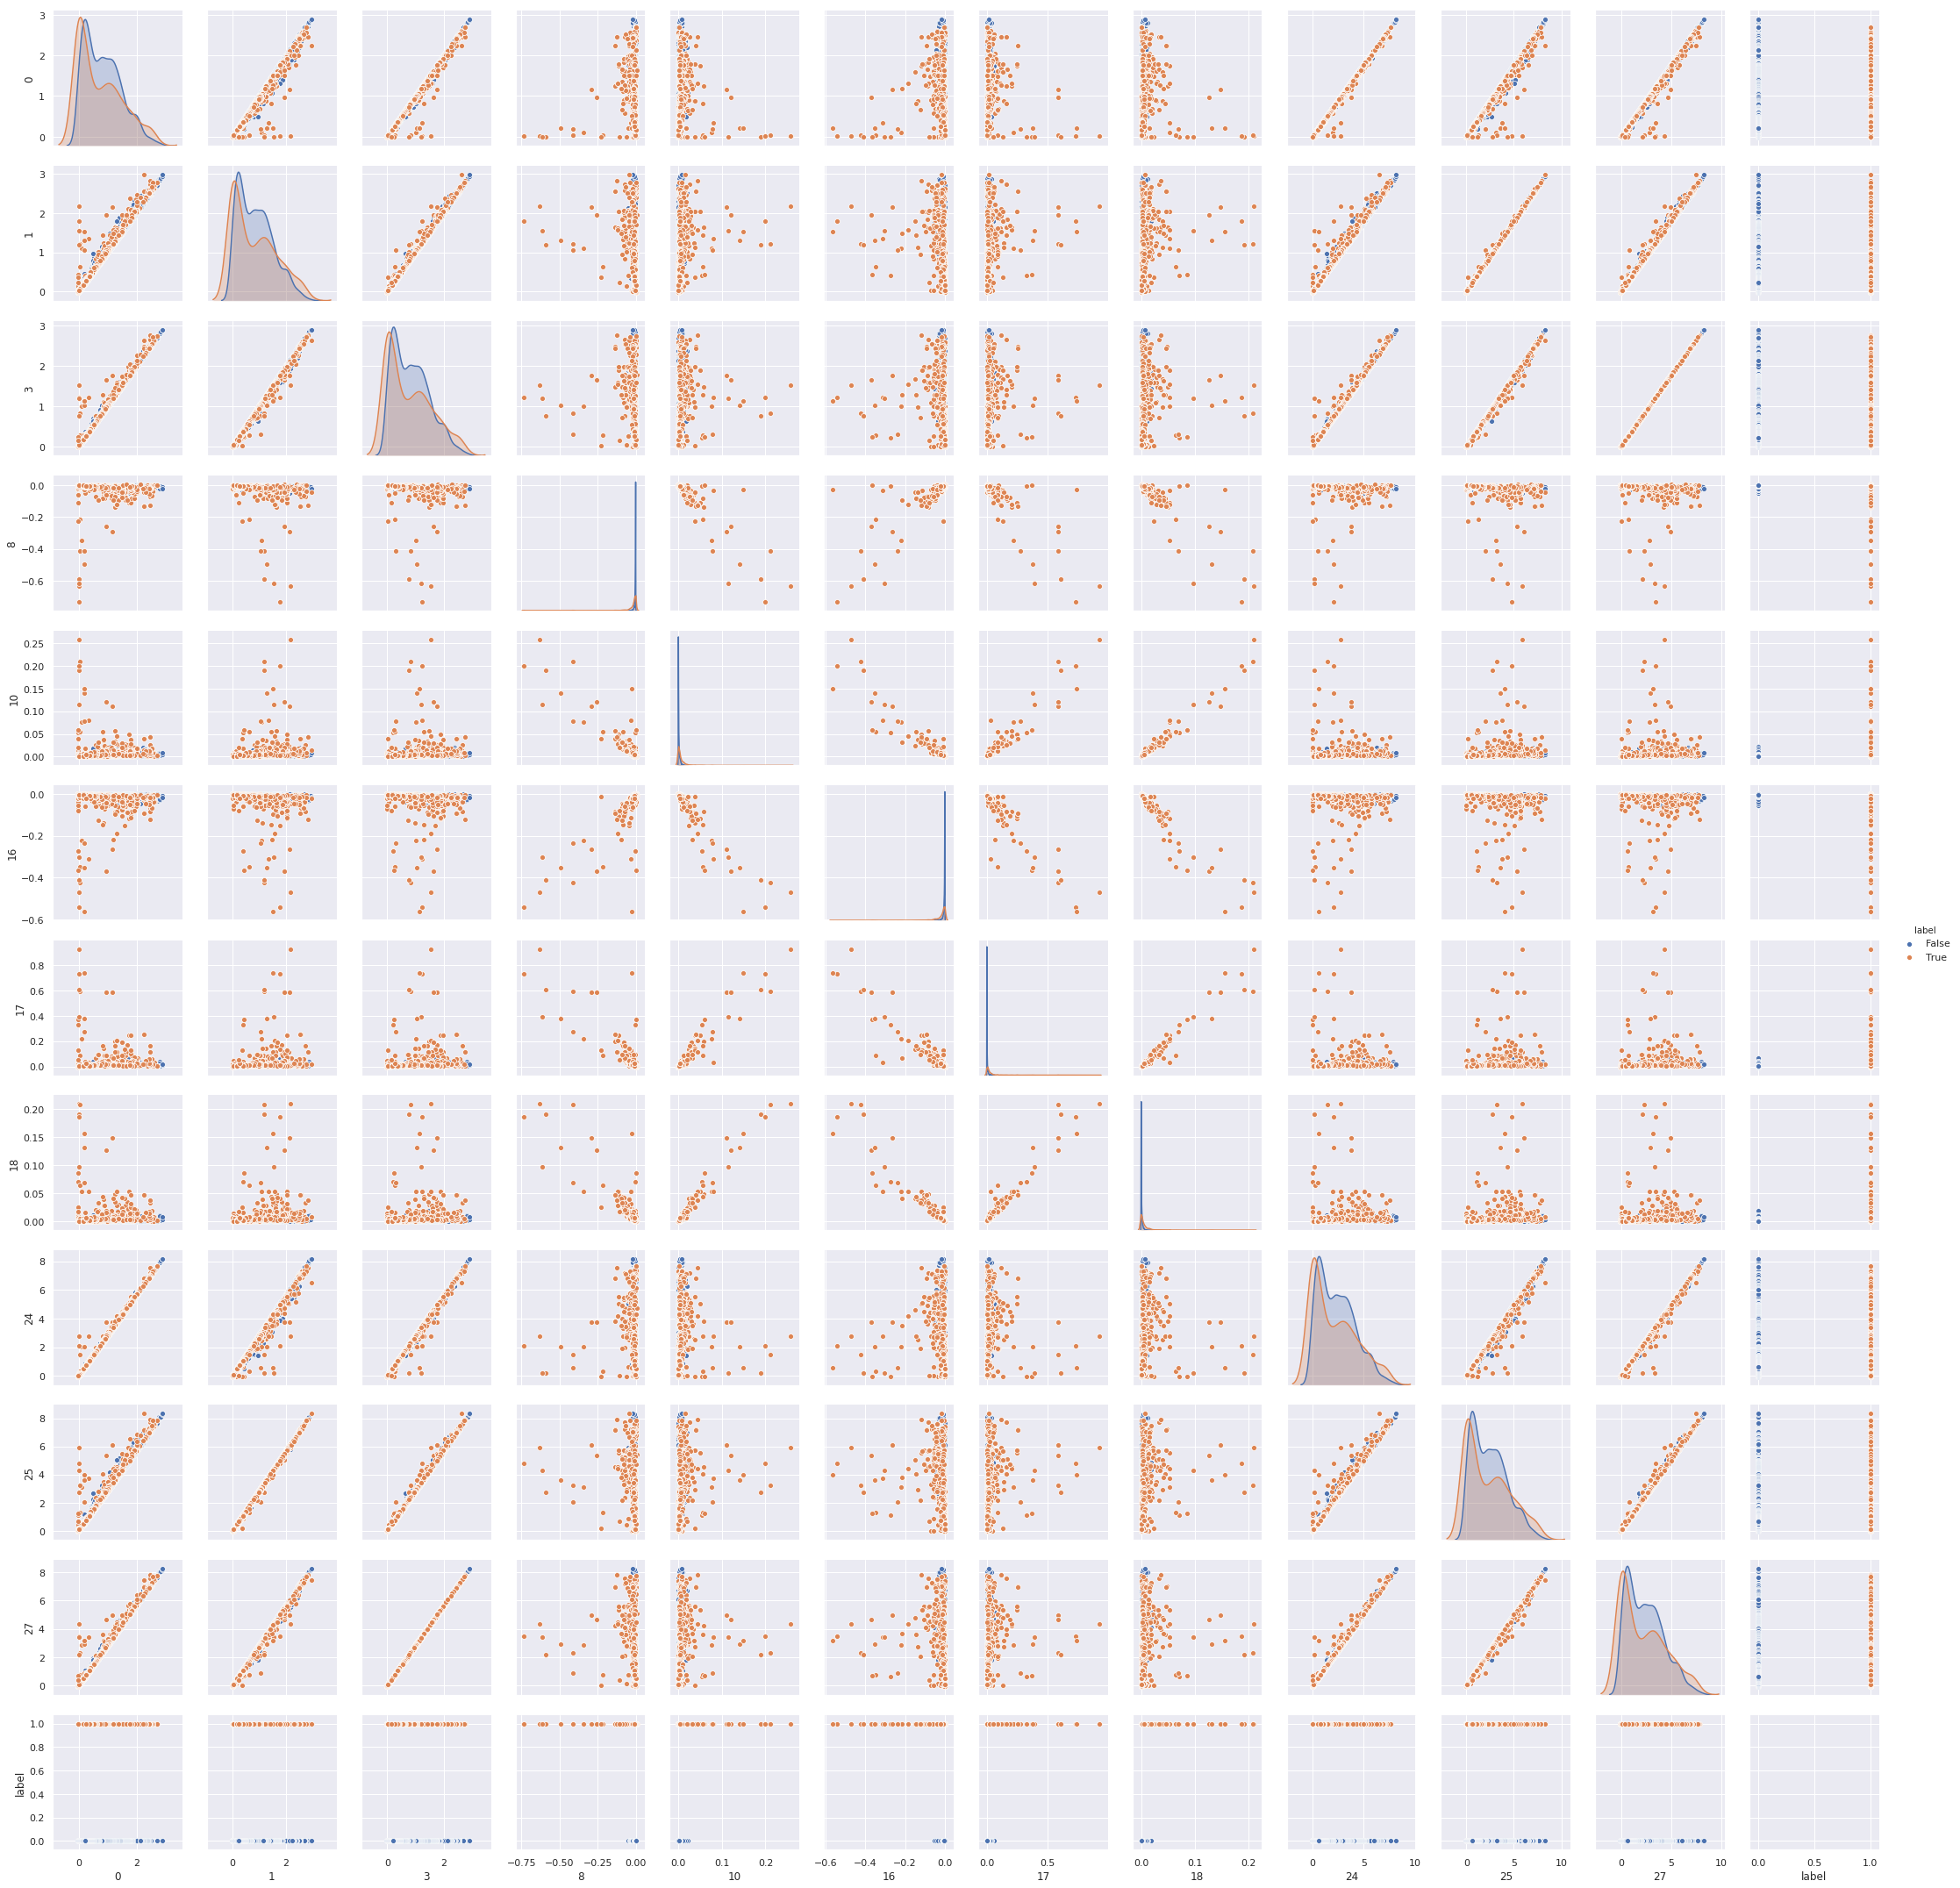

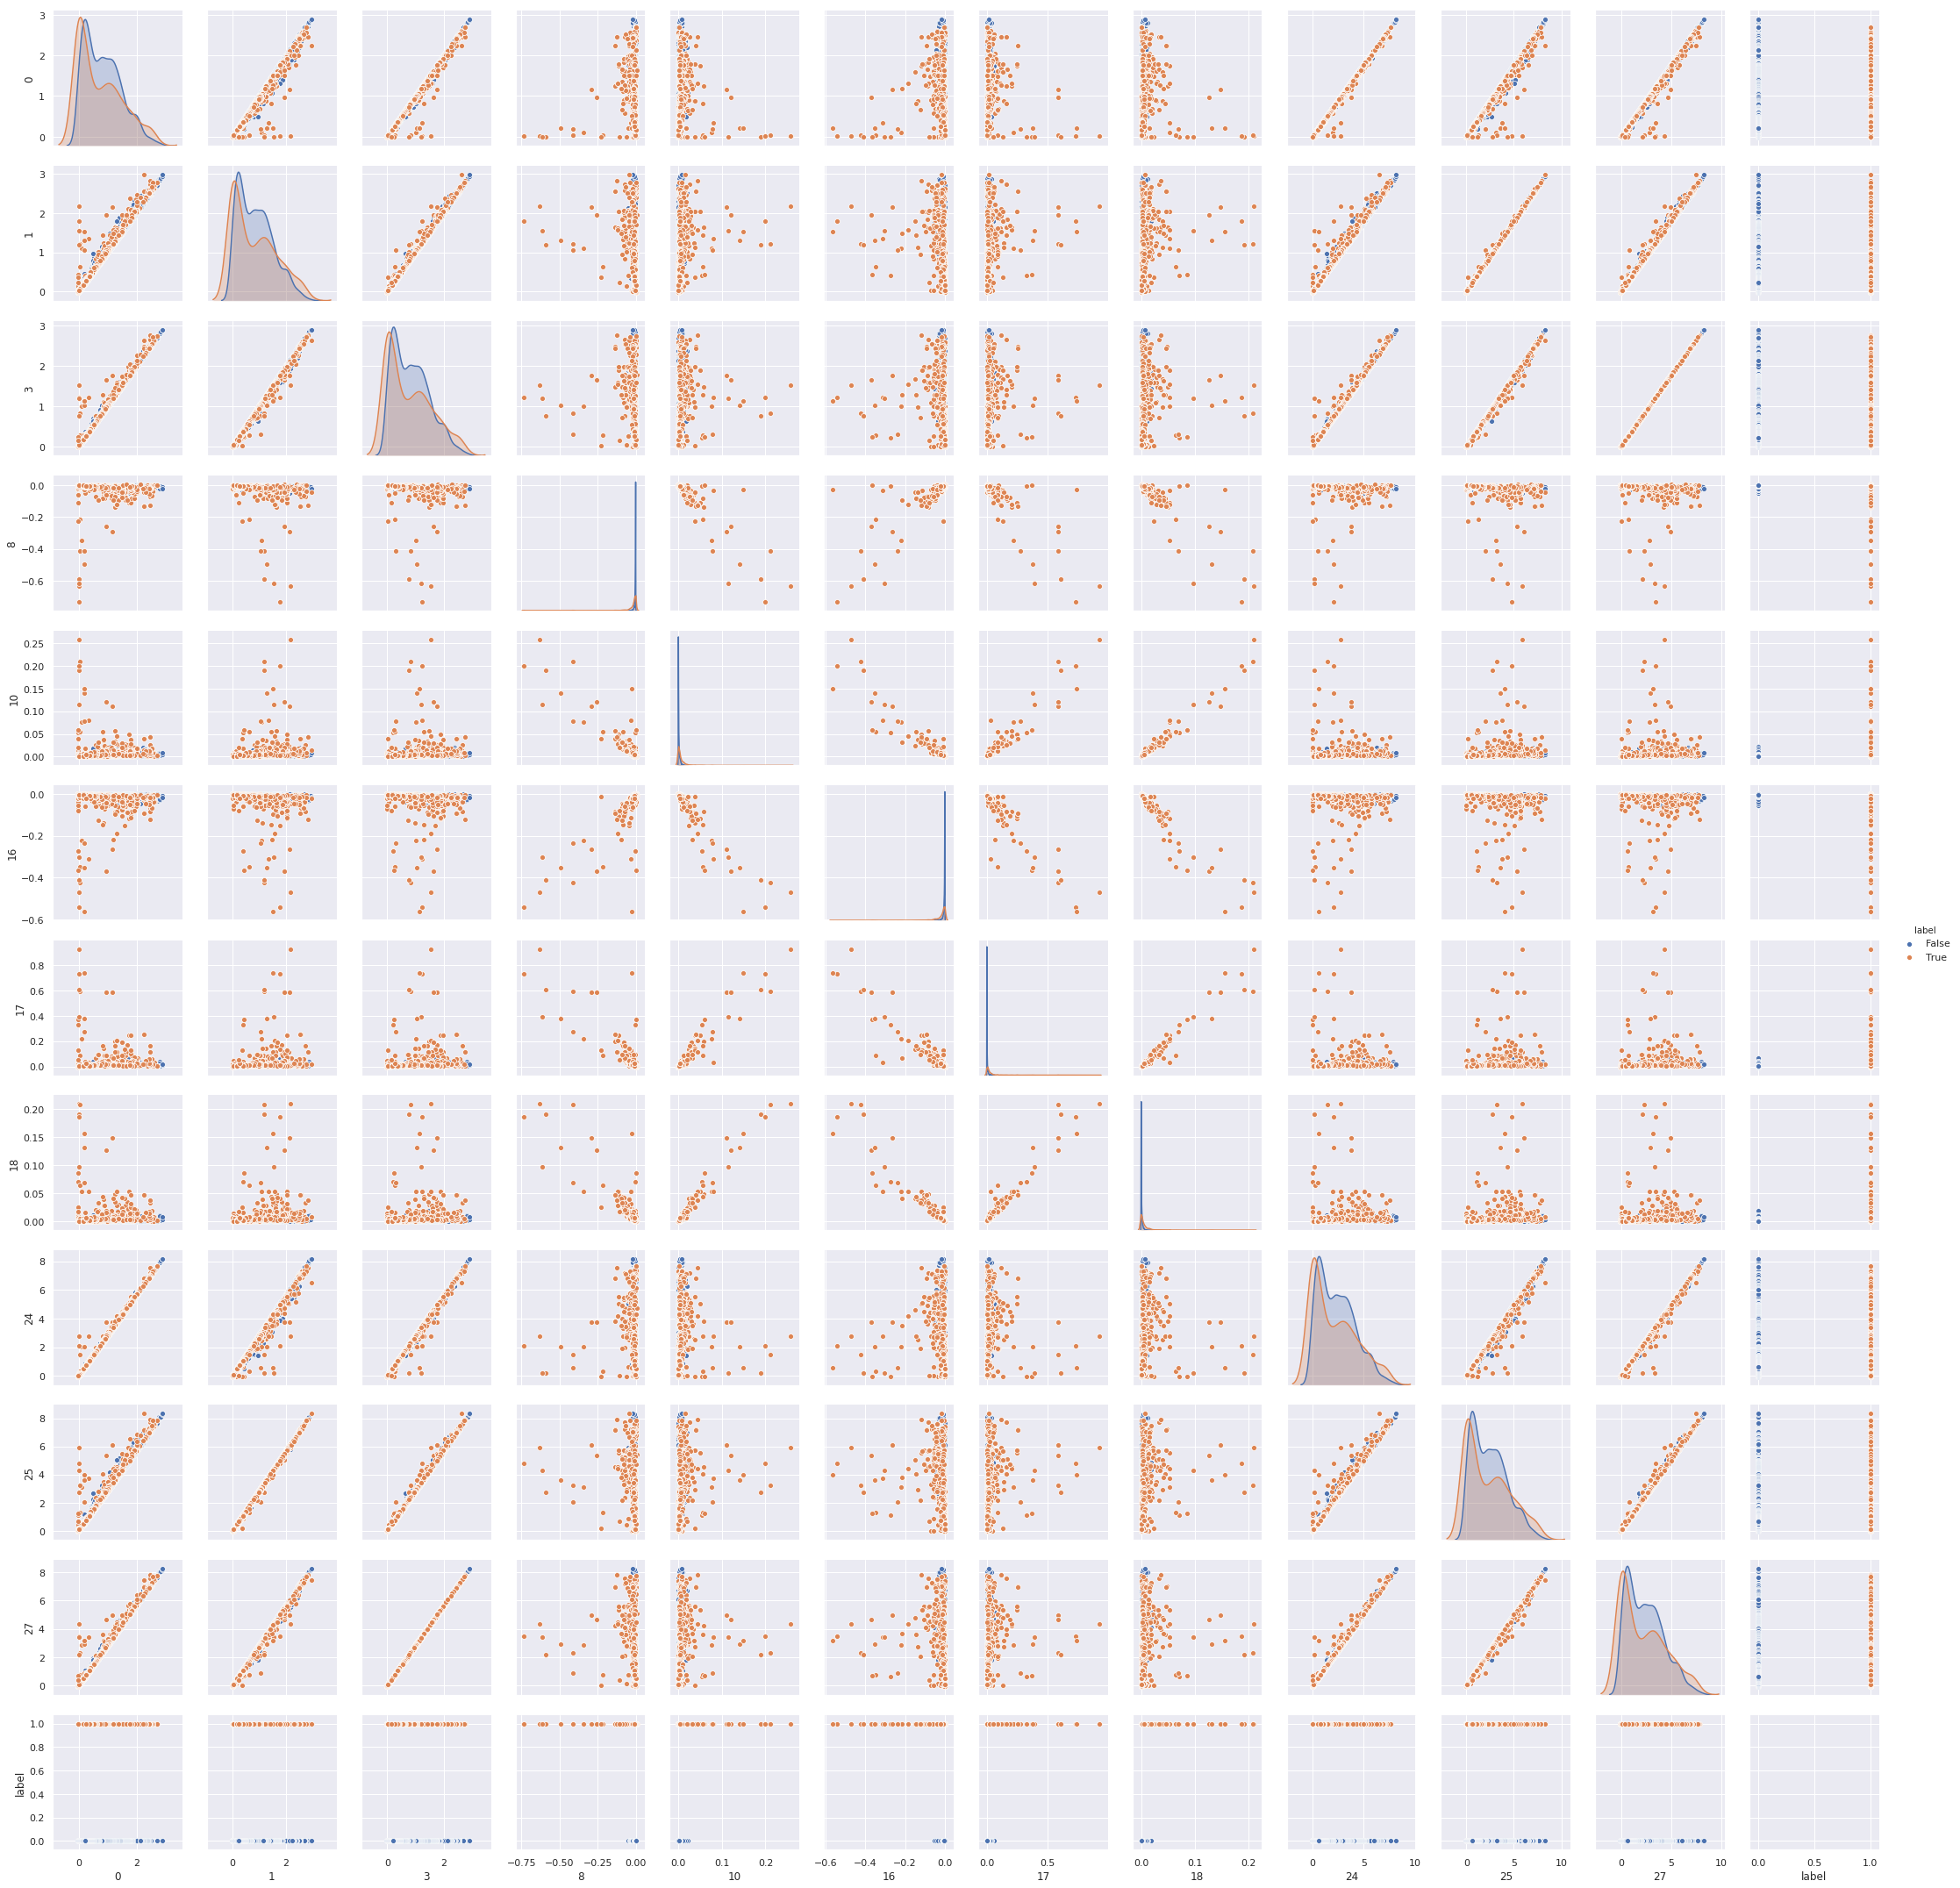

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.preprocessing import Normalizer

ensemble_list = [ExtraTreesClassifier(n_estimators=100), RandomForestClassifier(n_estimators=100)]
col = features.columns

for i in range(4):
    tnfeatures = Normalizer().transform(tfeatures.iloc[i*28:(i+1)*28, :])
    nfeatures = tnfeatures.T
    for est in ensemble_list:
        featureSelection = SelectFromModel(est, threshold=0.035714285714285)
        featureSelection.fit(nfeatures, features.label)
        selectedFeatures = featureSelection.transform(nfeatures)
        feat = np.array([k for k in range(i*28,(i+1)*28)])
        #feat = col[i*28:(i+1)*28]
        print(feat[featureSelection.get_support()])
        if i==0:
            ind = feat[featureSelection.get_support()]
    print("\n\n")

featuresPart = pd.concat([features.iloc[:, feat[featureSelection.get_support()]], features.label], axis=1)
sns.pairplot(featuresPart, hue='label', height=2.5)

# Fit Tests

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import hinge_loss, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#score = make_scorer(hinge_loss)
score = 'accuracy'

#model = LogisticRegression(C=1000, tol=0.001)
model = SVC(C=1000, gamma=0.001, kernel='rbf')
#model = RandomForestClassifier(n_estimators=100)

scores1 = cross_val_score(estimator=model,X=features.iloc[:,:112], y=features.label, scoring=score, cv=StratifiedKFold(10))
print("Raw features")
print(scores1.mean())
print()

tnfeatures = Normalizer().transform(tfeatures.iloc[:112, :])
nfeatures = tnfeatures.T
scores2 = cross_val_score(estimator=model,X=nfeatures, y=features.label, scoring=score, cv=StratifiedKFold(10))
print("Normalized features")
print(scores2.mean())
print()

scores3 = cross_val_score(estimator=model,X=nfeatures[:,selected], y=features.label, scoring=score, cv=StratifiedKFold(10))
print("Normalized selected features")
print(scores3.mean())


print('\n\n')

score = 'recall'

scores1 = cross_val_score(estimator=model,X=features.iloc[:,:112], y=features.label, scoring=score, cv=StratifiedKFold(10))
print("Raw features")
print(scores1.mean())
print()

tnfeatures = Normalizer().transform(tfeatures.iloc[:112, :])
nfeatures = tnfeatures.T
scores2 = cross_val_score(estimator=model,X=nfeatures, y=features.label, scoring=score, cv=StratifiedKFold(10))
print("Normalized features")
print(scores2.mean())
print()

scores3 = cross_val_score(estimator=model,X=nfeatures[:,selected], y=features.label, scoring=score, cv=StratifiedKFold(10))
print("Normalized selected features")
print(scores3.mean())

Raw features
0.7998416855829114

Normalized features
0.8661329375472906

Normalized selected features
0.8658913916535708



Raw features
0.20833333333333331

Normalized features
0.07666666666666667

Normalized selected features
0.07333333333333333


# TESTS

In [12]:
# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
# fit an Extra Trees model to the data
ensemble_list = [ExtraTreesClassifier(n_estimators=100), RandomForestClassifier(n_estimators=100)]
for est in ensemble_list:
    est.fit(features.iloc[:, :28], features["label"])
# display the relative importance of each attribute
    print(est.feature_importances_)

[0.06427025 0.04069783 0.02879415 0.04886765 0.02303449 0.02446383
 0.02359162 0.02511599 0.07020633 0.04157194 0.04752355 0.02369311
 0.01777545 0.01735526 0.01751683 0.01744964 0.0749474  0.06488946
 0.06981913 0.01820568 0.00974844 0.00918412 0.01703956 0.01748193
 0.05427083 0.05949569 0.02729965 0.04569021]
[0.08346166 0.02552994 0.02869594 0.03830917 0.04736252 0.02834501
 0.0226708  0.0270094  0.1030324  0.03674292 0.05517888 0.02814528
 0.01589802 0.01516755 0.01863713 0.01624966 0.05361549 0.07076341
 0.08003661 0.02018685 0.00196541 0.00255725 0.01005125 0.00802656
 0.06518618 0.03334718 0.0231808  0.04064673]


In [18]:
# Recursive Feature Elimination
from sklearn.svm import SVC
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe.fit(features.iloc[:, :28], features["label"])
# summarize the selection of the attributes
print("RFE NUMBERS:")
print(rfe.ranking_)

model = SVC(kernel="linear")
rfe = RFE(model, 3)
rfe.fit(features.iloc[:, :28], features["label"])
print("RFE NUMBERS:")
print(rfe.ranking_)

#RFE model with Cross Validation
#, scoring='accuracy'

model = SVC(kernel="linear")
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(2))
rfecv.fit(features.iloc[:, :28], features["label"])
print("\n\nRFECV NUMBERS:")
print(rfecv.n_features_)
print(rfecv.ranking_)
model = LogisticRegression()
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(2))
rfecv.fit(features.iloc[:, :28], features["label"])
print("RFECV NUMBERS:")
print(rfecv.n_features_)
print(rfecv.ranking_)



selK = SelectKBest(f_classif, k=6)
selK.fit(features.iloc[:, :28], features["label"])
print("\n\nSELECT K BEST NUMBERS:")
print(selK.get_support())
print(selK.scores_)

RFE NUMBERS:
[ 3  4 11 16 12 10 15 14  2  1  8 17 21 22 20 19  1  1  7 18 25 26 24 23
  6  5  9 13]
RFE NUMBERS:
[ 5 11 10 13 17 15 14 12  1  2  4  9 22 21 19 20  1  1  3 18 25 26 24 23
  8  7 16  6]


RFECV NUMBERS:
5
[ 3  9  8 11 15 13 12 10  1  1  2  7 20 19 17 18  1  1  1 16 23 24 22 21
  6  5 14  4]
RFECV NUMBERS:
6
[ 1  1  8 13  9  7 12 11  1  1  5 14 18 19 17 16  1  1  4 15 22 23 21 20
  3  2  6 10]


SELECT K BEST NUMBERS:
[False False False False False False False False  True  True  True False
 False False False False  True  True  True False False False False False
 False False False False]
[ 14.83733383   2.64773741 216.25321271   6.10124776   2.30161449
   2.30161449   2.67907026   2.67907026 315.28839958 277.45778452
 330.9079015    1.77919847  48.60739824  48.60739824  28.23374354
  25.13126669 422.54146593 335.18651221 382.78688292   1.03911178
  26.56994587  26.56994587  23.82749102  23.65037689  10.63237147
   3.59993633 189.3751227    6.10141133]


/home/vasilis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/vasilis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/vasilis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depr

/home/vasilis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/vasilis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/vasilis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depr

/home/vasilis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/vasilis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/vasilis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depr

Text(0,0.5,'Prediction rate')

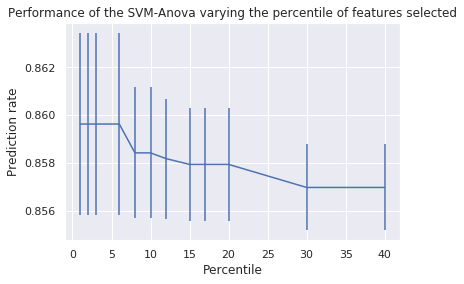

In [34]:
from sklearn.feature_selection import SelectPercentile, chi2, f_classif, mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# #############################################################################
# Create a feature-selection transform and an instance of SVM that we
# combine together to have an full-blown estimator

transform = SelectPercentile(mutual_info_classif)

clf = Pipeline([('anova', transform), ('svc', cSVC(kernel='rbf',gamma="auto"))])

# #############################################################################
# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
percentiles = (1, 2 ,3, 6, 8, 10, 12, 15, 17, 20, 30, 40)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    # Compute cross-validation score using 1 CPU
    this_scores = cross_val_score(clf, features.iloc[:,:28], features.label, cv=5, n_jobs=1)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))

plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xlabel('Percentile')
plt.ylabel('Prediction rate')

#plt.axis('tight')